
## $\hspace{70pt}$Data Visualization and Analytics Lab (CSP451-3)
## $\hspace{120pt}$ Practical 7


### Name :Vinni Fengade
### Roll No. :67

## $\hspace{70pt} $PART(A): Data Analysis

### Present dataset analysis by:
### a. displaying the dependent and independent variables

In [2]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Assuming 'df' is your DataFrame
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


### b. plotting various plots to understand the data (count Vs different types of smoking_status, Male/female count plot, etc. )

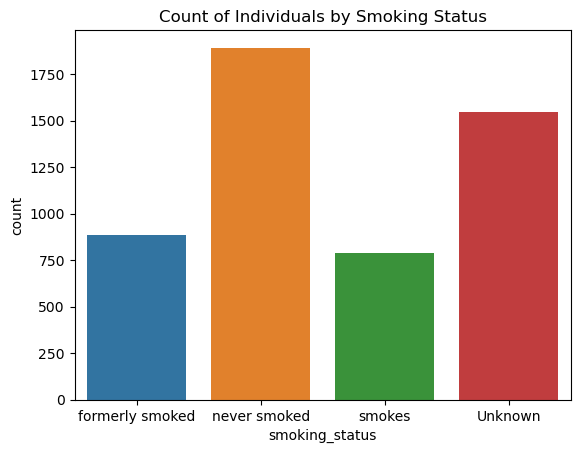

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='smoking_status', data=df)
plt.title('Count of Individuals by Smoking Status')
plt.show()

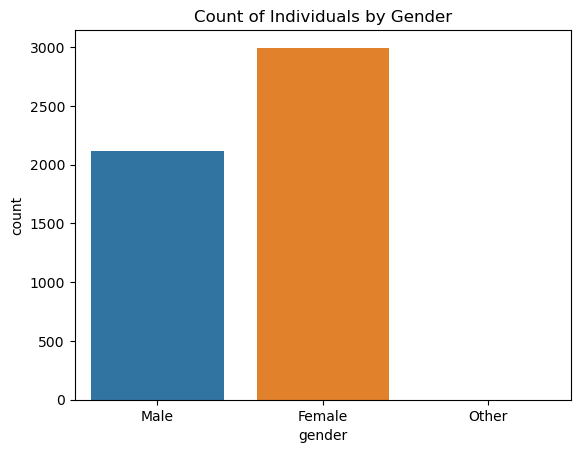

In [8]:
sns.countplot(x='Gender', data=df)
plt.title('Count of Individuals by Gender')
plt.show()


### c. combined graph of bar and box plot for AGE attributeshowing the spread.

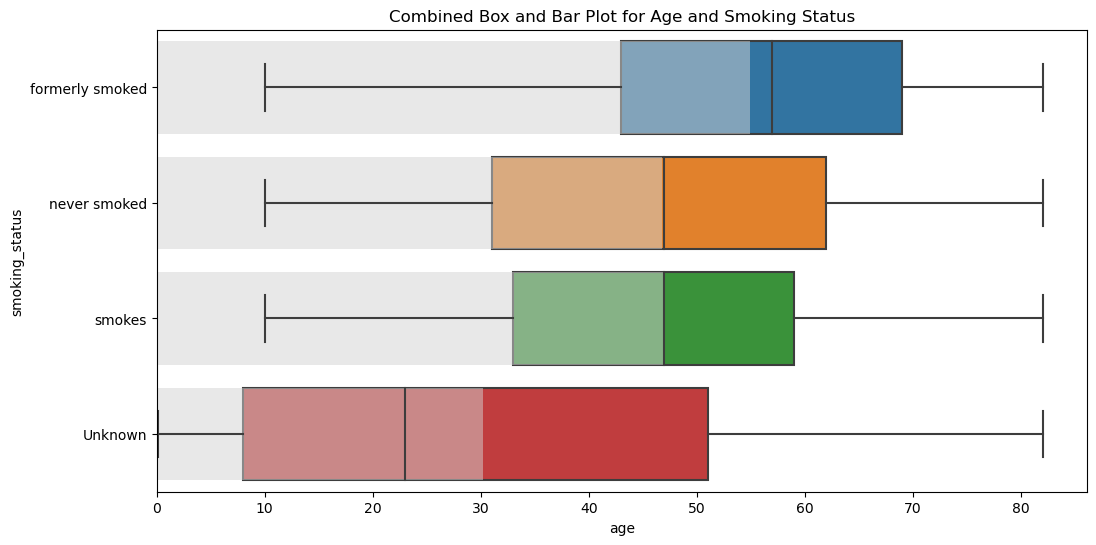

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='smoking_status', data=df)
sns.barplot(x='age', y='smoking_status', data=df, ci=None, color='lightgrey', alpha=0.5)
plt.title('Combined Box and Bar Plot for Age and Smoking Status')
plt.show()

### d. Correlation heatmap for various features]

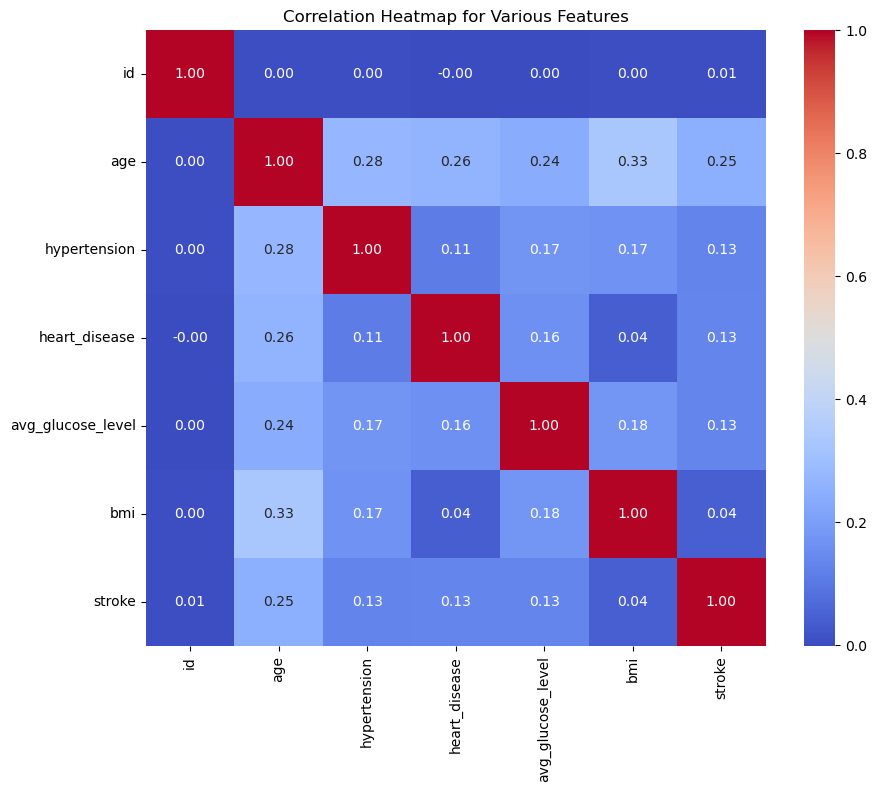

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Various Features')
plt.show()

##  $\hspace{70pt} $PART(B): Implement and apply various statistical tests

###  1. Perform chi-square test by writing user defined functions. First create the Contingency Table by counting appropriate columns from the given dataset. Compute the expected values. Consider the critical value as input from user and conclude regarding different questions:

### a) Prove (or disprove) that there are not any difference in stroke occuring between Female and Male.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
contingency_table = pd.crosstab(data['gender'],data['stroke']) 
contingency_table

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [4]:
stroke_sum = contingency_table.sum()
gender_sum = contingency_table.sum(axis = 1)
final_sum = gender_sum.sum()


In [5]:
print(stroke_sum)
print(gender_sum)

stroke
0    4861
1     249
dtype: int64
gender
Female    2994
Male      2115
Other        1
dtype: int64


In [6]:
expected=[[0,0],[0,0],[0,0]]
for i in range(3):
    for j in range(2):
        expected[i][j] = (gender_sum[i]*stroke_sum[j])/(final_sum)
expected

[[2848.108414872798, 145.89158512720155],
 [2011.940313111546, 103.05968688845401],
 [0.9512720156555773, 0.0487279843444227]]

In [7]:
ans = 0
for i in range(2):
    for j in range(3):
        k = (contingency_table[i][j] - expected[j][i])
        ans += (k**2)/ expected[j][i]
print(ans)

if ans>5.991:
    print('Null Hypothesis accepted')
else:
    print('Null hypothesis is rejected')

0.47258662884530234
Null hypothesis is rejected


In [9]:
def chi_square_test(observed, alpha=0.05):
    stat, p, dof, expected = chi2_contingency(observed)
    print(f'Chi-square statistic: {stat}')
    print(f'P-value: {p}')
    print(f'Degrees of freedom: {dof}')
    print('Expected frequencies:')
    print(expected)

    # Compare p-value with alpha
    if p <= alpha:
        print("Reject the null hypothesis (significant difference)")
    else:
        print("Fail to reject the null hypothesis (no significant difference)")

In [10]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

observed_gender_stroke = pd.crosstab(df['gender'], df['stroke'])
print("Chi-square test for gender and stroke:")
chi_square_test(observed_gender_stroke)

Chi-square test for gender and stroke:
Chi-square statistic: 0.47258662884530234
P-value: 0.7895490538408245
Degrees of freedom: 2
Expected frequencies:
[[2.84810841e+03 1.45891585e+02]
 [2.01194031e+03 1.03059687e+02]
 [9.51272016e-01 4.87279843e-02]]
Fail to reject the null hypothesis (no significant difference)


### b) Prove (or disprove) that there are not any difference in work type of person getting stroke or not.

In [11]:
ct = pd.crosstab(data['work_type'],data['stroke']) 
ct

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


In [14]:
stroke_sum = ct.sum()
gender_sum = ct.sum(axis = 1)
final_sum = gender_sum.sum()
print(stroke_sum)
print(gender_sum)

stroke
0    4861
1     249
dtype: int64
work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
dtype: int64


In [15]:
expected=[[0,0],[0,0],[0,0],[0,0],[0,0]]
for i in range(5):
    for j in range(2):
        expected[i][j] = (gender_sum[i]*stroke_sum[j])/(final_sum)
expected

[[624.9857142857143, 32.01428571428571],
 [20.9279843444227, 1.0720156555772995],
 [2782.4706457925636, 142.5293542074364],
 [779.0917808219178, 39.90821917808219],
 [653.5238747553816, 33.476125244618395]]

In [16]:
ans = 0
for i in range(2):
    for j in range(5):
        k = (ct[i][j] - expected[j][i])
        ans += (k**2)/ expected[j][i]
print(ans)

if ans>9.481:
    print('Null Hypothesis accepted')
else:
    print('Null hypothesis is rejected')

49.163511976675295
Null Hypothesis accepted


In [17]:
observed_worktype_stroke = pd.crosstab(df['work_type'], df['stroke'])
print("\nChi-square test for work type and stroke:")
chi_square_test(observed_worktype_stroke)


Chi-square test for work type and stroke:
Chi-square statistic: 49.163511976675295
P-value: 5.397707801896119e-10
Degrees of freedom: 4
Expected frequencies:
[[6.24985714e+02 3.20142857e+01]
 [2.09279843e+01 1.07201566e+00]
 [2.78247065e+03 1.42529354e+02]
 [7.79091781e+02 3.99082192e+01]
 [6.53523875e+02 3.34761252e+01]]
Reject the null hypothesis (significant difference)


### c) Prove (or disprove) that there are not any difference in age group of person getting stroke or not. [discretize the age column first into different ae groups to answer this question.]

In [24]:
age_bins = [0, 18, 35, 50, 70, 100]
age_labels = ['0-18', '19-35', '36-50', '51-70', '71-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [26]:
# Chi-square test for age group and stroke
observed_agegroup_stroke = pd.crosstab(df['age_group'], df['stroke'])
print("\nChi-square test for age group and stroke:")
chi_square_test(observed_agegroup_stroke)


Chi-square test for age group and stroke:
Chi-square statistic: 391.16471485971033
P-value: 2.2553084622024295e-83
Degrees of freedom: 4
Expected frequencies:
[[ 814.2888454    41.7111546 ]
 [ 940.80802348   48.19197652]
 [1003.59197652   51.40802348]
 [1384.10078278   70.89921722]
 [ 718.21037182   36.78962818]]
Reject the null hypothesis (significant difference)


### 2. Predict if avg_glucose_level has any effect on stroke occurance by writing by writing user defined function to perform T-test.

In [27]:
import scipy.stats as stats

def t_test_avg_glucose_and_stroke(df):
    # Split the dataset into two groups: with stroke and without stroke
    with_stroke = df[df['stroke'] == 1]['avg_glucose_level']
    without_stroke = df[df['stroke'] == 0]['avg_glucose_level']

    # Perform independent t-test
    t_statistic, p_value = stats.ttest_ind(with_stroke, without_stroke, equal_var=False)

    # Print results
    print(f'T-Statistic: {t_statistic}')
    print(f'P-Value: {p_value}')

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in average glucose levels between those with and without stroke.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in average glucose levels between those with and without stroke.")

# Assuming df is your DataFrame
t_test_avg_glucose_and_stroke(df)


T-Statistic: 6.982411744792963
P-Value: 2.4014366563697676e-11
Reject the null hypothesis: There is a significant difference in average glucose levels between those with and without stroke.


### 3. Apply ANNOVA Test on iris dataset to check if sample means of all fetaures is same.

In [1]:
import pandas as pd
from scipy.stats import f_oneway
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Perform ANOVA test for each feature
def anova_test(data, feature):
    groups = [data[data['target'] == i][feature] for i in range(3)]  # Assuming three classes in the target variable
    f_statistic, p_value = f_oneway(*groups)

    print(f'ANOVA Test for {feature}:')
    print(f'F-statistic: {f_statistic}')
    print(f'P-value: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        print(f'Reject the null hypothesis: There is a significant difference in {feature} means.')
    else:
        print(f'Fail to reject the null hypothesis: No significant difference in {feature} means.')

# Apply ANOVA test for each feature in the Iris dataset
for feature in iris.feature_names:
    anova_test(data, feature)
    print("\n")


ANOVA Test for sepal length (cm):
F-statistic: 119.26450218450468
P-value: 1.6696691907693826e-31
Reject the null hypothesis: There is a significant difference in sepal length (cm) means.


ANOVA Test for sepal width (cm):
F-statistic: 49.160040089612075
P-value: 4.492017133309115e-17
Reject the null hypothesis: There is a significant difference in sepal width (cm) means.


ANOVA Test for petal length (cm):
F-statistic: 1180.161182252981
P-value: 2.8567766109615584e-91
Reject the null hypothesis: There is a significant difference in petal length (cm) means.


ANOVA Test for petal width (cm):
F-statistic: 960.007146801809
P-value: 4.169445839443116e-85
Reject the null hypothesis: There is a significant difference in petal width (cm) means.


